Mean Squared Error: 2848523443.4191008
R-squared Score: 0.6286307301050609
               Coefficient
GrLivArea       100.636895
BedroomAbvGr -26645.532516
TotalBath     27083.207713


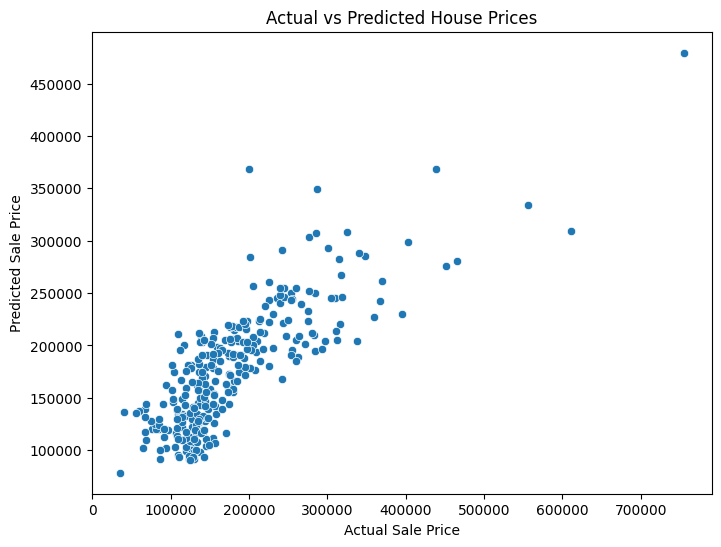

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("train.csv")  # Assuming you've downloaded it manually from Kaggle

# Select features and target
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath']  # Convert half bath to 0.5
features = df[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
target = df['SalePrice']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Coefficients
coeff_df = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print(coeff_df)

# Plotting predictions vs actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()
